In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv("merged_data_all.csv")
data['Price_Change'] = data['Close'] - data['Open']
data['Price_Movement'] = np.where(data['Price_Change'] > 0, 1, 0)  # 1 for up, 0 for down

# Separate features (X) and target (y)
y = data['Price_Movement']
X = data.select_dtypes(include=[np.number]).drop(columns=['Price_Movement'])

# Handle missing values and normalize data
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features

# Reshape for CNN (samples, time steps, features)
X_cnn = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

# Define CNN model
model = Sequential([
    Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, X_cnn.shape[2])),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)


# Make predictions
y_pred_probs = model.predict(X_test).flatten()  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print("Model Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)



model.save("cnn_model.keras")
print("CNN model saved as 'cnn_model.keras'")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5653 - loss: 0.6796 - val_accuracy: 0.5664 - val_loss: 0.6617
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6865 - loss: 0.6175 - val_accuracy: 0.7343 - val_loss: 0.6033
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7385 - loss: 0.5892 - val_accuracy: 0.6993 - val_loss: 0.5755
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7786 - loss: 0.5354 - val_accuracy: 0.7762 - val_loss: 0.5250
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8359 - loss: 0.4723 - val_accuracy: 0.7762 - val_loss: 0.4834
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8592 - loss: 0.4079 - val_accuracy: 0.8392 - val_loss: 0.4349
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8692 - loss: 0.3723 - val_accuracy: 0.8392 - val_loss: 0.3834
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8650 - loss: 0.3390 - val_accuracy: 0.8531 - val_loss: 0.3554
Ep

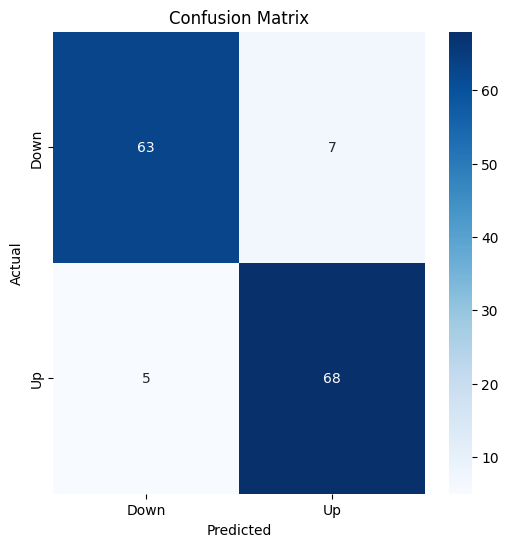

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Down", "Up"], yticklabels=["Down", "Up"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()